<a href="https://colab.research.google.com/github/Pestrdan/netology_research/blob/main/STPY_38_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['variety'] = iris.target

In [ ]:
df = data[['sepal length (cm)', 'sepal width (cm)']]
df_class = iris.target
df.tail()

,sepal length (cm),sepal width (cm)
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4
149,5.9,3.0


In [ ]:
df_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# разделение выборки на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df_class, random_state=42)

In [ ]:
# импорт lda и инициализация
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем данные (подбор коэффициентов)
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0])

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,1
1,0,0
2,2,2
3,1,1
4,1,2
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


In [ ]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов
# (наблюдений в категориях примерно одинаковое количество)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.868421052631579

In [ ]:
lda.coef_

array([[-5.83421967,  8.36880937],
       [ 1.5215595 , -3.81430503],
       [ 3.81202284, -3.79343242]])

In [ ]:
data[['sepal length (cm)', 'sepal width (cm)']].corr()

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


Показатель точности довольно высокий, но не идеальный. Второй признак имеет большее влияние чем 1. При этом между признаками практически нет корреляции, что хорошо. Для построения более точной модели требуется больше признаков

In [ ]:
# центроиды
lda.means_

array([[4.99714286, 3.42857143],
       [5.88717949, 2.75128205],
       [6.53947368, 2.97894737]])

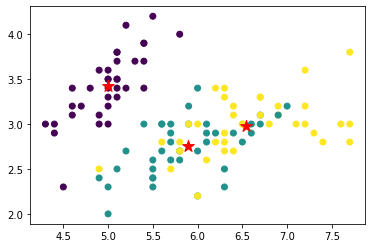

In [ ]:
# визуализируем предсказания для тренировочной выборки
import matplotlib.pyplot as plt
plt.scatter(x=X_train['sepal length (cm)'], y=X_train['sepal width (cm)'], c=y_train)
# визуализируем центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

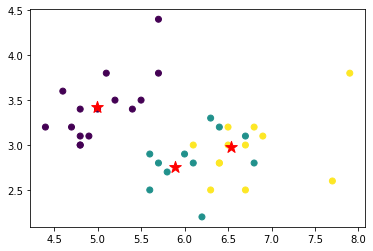

In [ ]:
# визуализируем предсказания для тестовой выборки
plt.scatter(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], c=y_test)
# визуализируем центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

In [ ]:
# строим график локтя
from sklearn.cluster import KMeans
# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 8)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(df)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

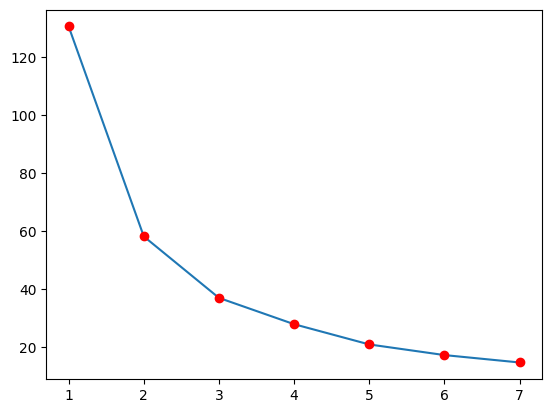

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Визуально последнее значимое изменение показателя инерции наблюдается между 4 и 5 кластерами, поэтому используем 5 кластеров

In [ ]:
# указываем количество кластеров
kmeans = KMeans(n_clusters=5)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(df)
clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3,
       3, 2, 3, 2, 3, 2, 1, 4, 1, 0, 4, 0, 4, 2, 4, 2, 2, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 2, 0, 4, 0, 1, 4, 4, 1, 2, 1, 4, 1,
       4, 4, 4, 0, 0, 4, 4, 1, 1, 0, 1, 0, 1, 4, 4, 1, 0, 0, 4, 1, 1, 1,
       4, 4, 0, 1, 4, 4, 0, 1, 4, 1, 0, 4, 4, 4, 0, 4, 4, 0], dtype=int32)

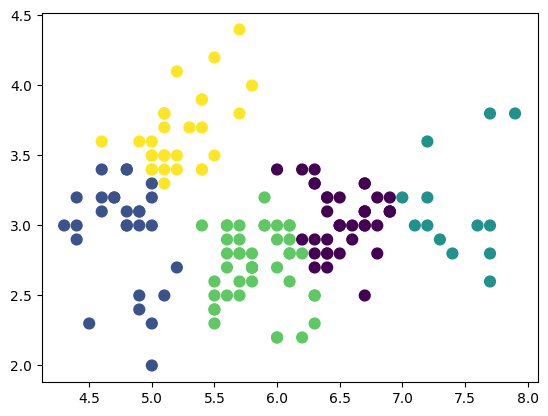

In [ ]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=clusters, s=60)